In [353]:
#Bike Sharing Case Study

#Problem Statement
#BoomBikes, a US-based bike-sharing provider, has been facing revenue decline due to the Covid-19 pandemic.
#In an attempt to prepare for the post-lockdown market, the company has hired a consulting firm to understand the factors affecting demand for shared bikes in the American market.
#The firm has collected a large dataset on daily bike demands based on various meteorological surveys and people's styles.
#Essentially, the company wants —

# -To identify the variables affecting the count of total rental bikes including both casual and registered, e.g. season, month, weekday, workingday, temperature, humidity, windspeed, etc.
# -To create a linear model that quantitatively relates the count of total rental bikes with variables such as season, month, weekday, workingday, temperature, humidity, windspeed, etc.
# -To know the accuracy of the model, i.e. how well these variables can predict  the count of total rental bikes.

#The business goal is to model the demand for shared bikes with available independent variables and use it to understand demand dynamics and manipulate business strategy to meet customer expectations and increase profits.

In [346]:
#Step 1: Reading and Understanding the Data
#First import NumPy and Pandas and read the housing dataset

In [365]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [366]:
import numpy as np
import pandas as pd

In [368]:
bikes = pd.read_csv("day.csv")

In [369]:
# Check the head of the dataset
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
#Inspect the various aspects of the bike sharing dataframe

In [370]:
bikes.shape

(730, 16)

In [358]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [371]:
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [372]:
#Step 2: Visualising the Data
#Understanding the data.

# -If there is some obvious multicollinearity going on, this is the first place to catch it
# -Identify if some predictors directly have a strong association with the outcome variable
# -Visualise the data using matplotlib and seaborn.

In [373]:
import matplotlib.pyplot as plt
import seaborn as sns

In [361]:
#Visualising Numeric Variables
#Make a pairplot of all the numeric variables

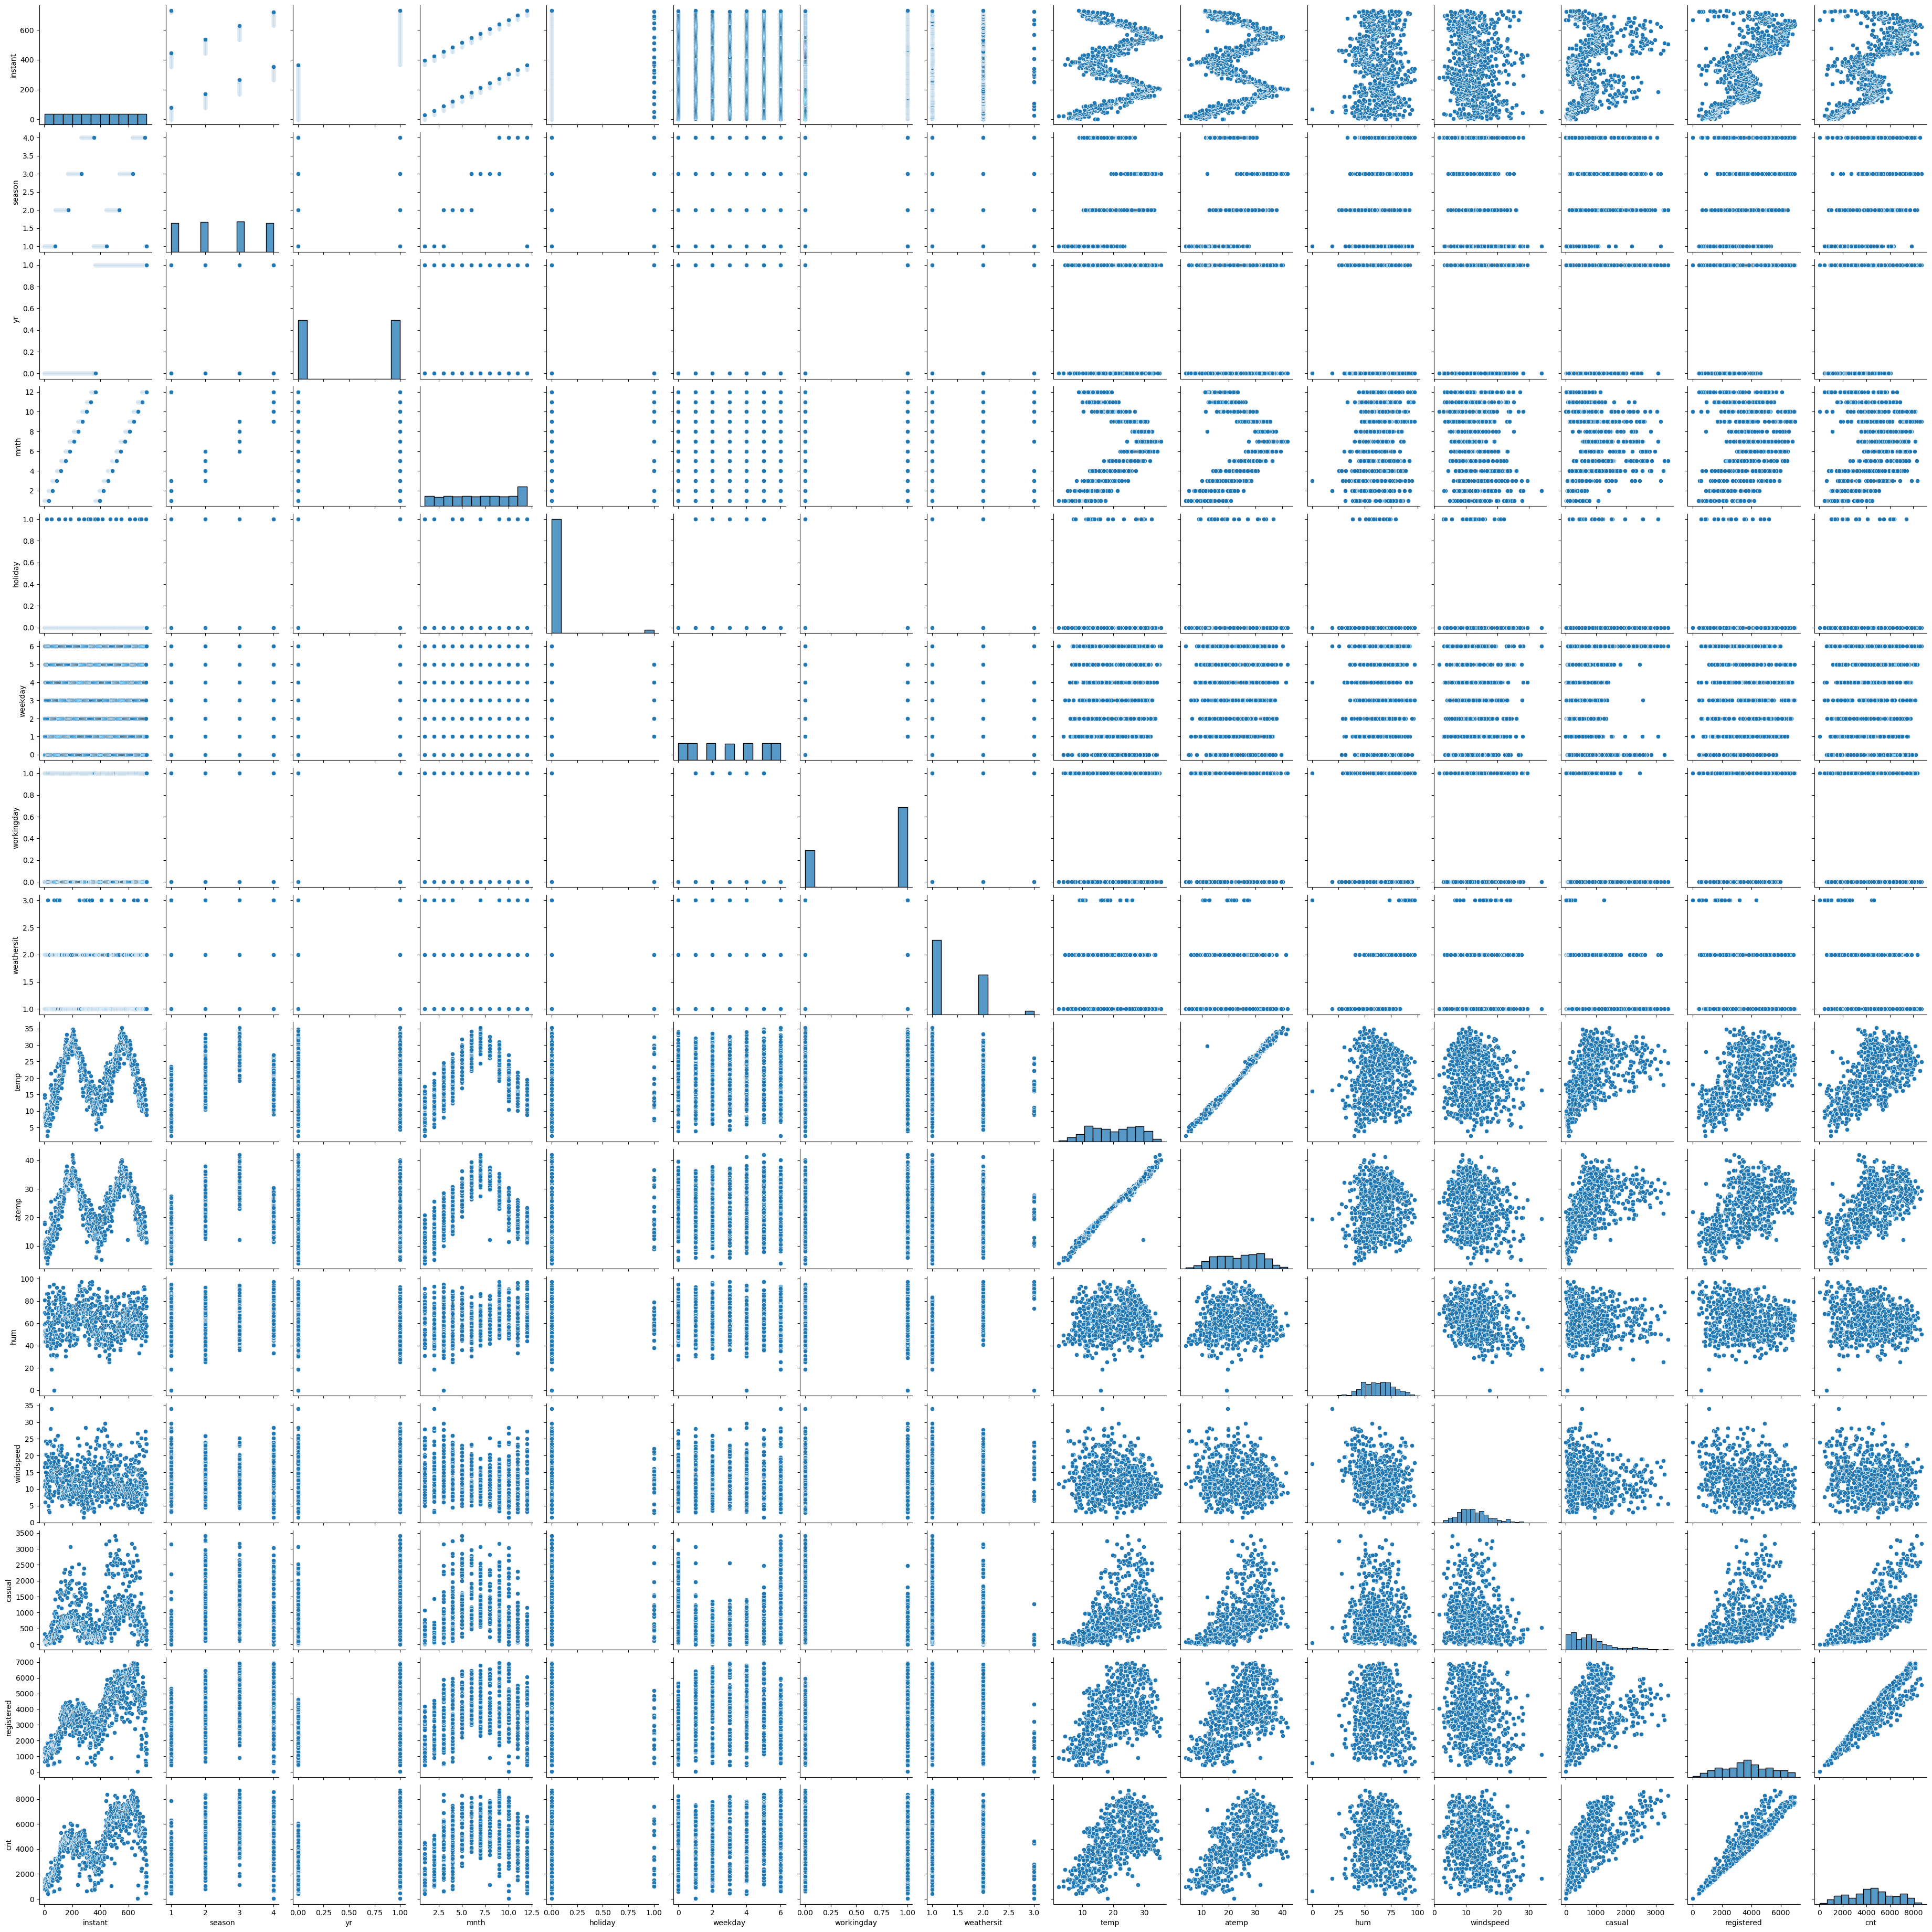

In [374]:
sns.pairplot(bikes)
plt.show()

In [15]:
#Visualising Categorical Variables
#There are a few categorical variables as well. Let's make a boxplot for some of these variables.

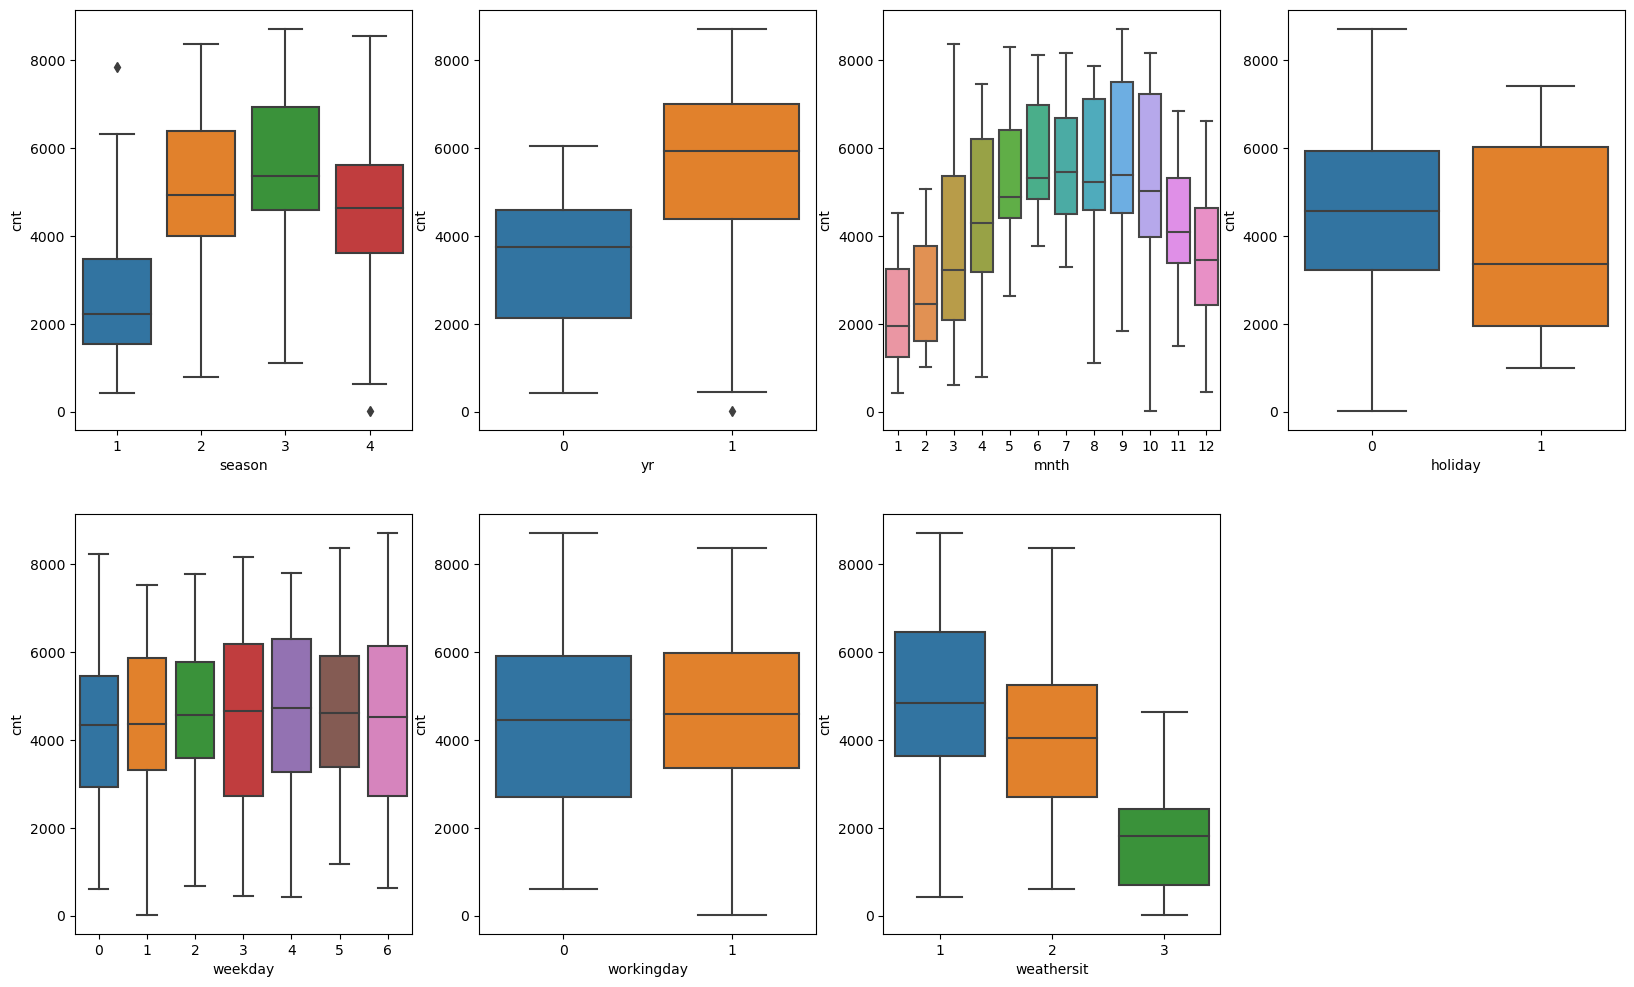

In [375]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikes)
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bikes)
plt.subplot(2,4,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikes)
plt.subplot(2,4,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikes)
plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikes)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikes)
plt.subplot(2,4,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikes)
plt.show()

In [18]:
#We can also visualise some of these categorical features parallely by using the hue argument. Below is the plot for weathersite, cnt with workingday as the hue.

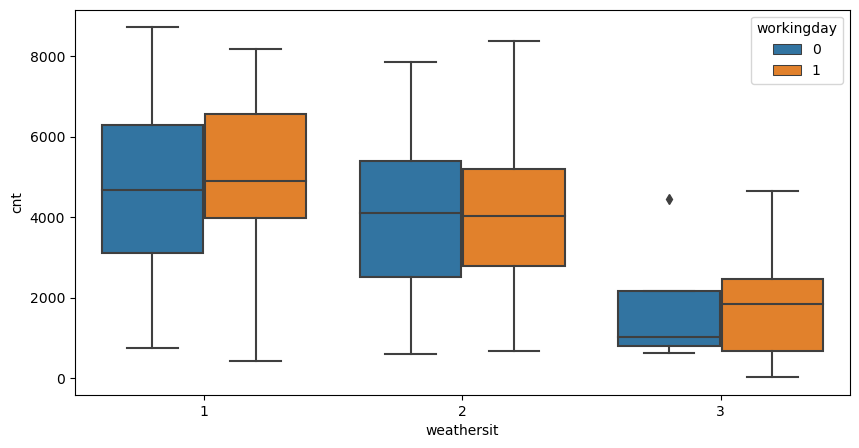

In [376]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'weathersit', y = 'cnt', hue = 'workingday', data = bikes)
plt.show()

In [377]:
#Step 3: Data Preparation
# Drop 'instance' as it isn't used to building a linear regression model.
bikes.drop(['instant'], axis = 1, inplace = True)

In [378]:
# Drop 'dteday' as it isn't used to building a linear regression model.
bikes.drop(['dteday'], axis = 1, inplace = True)

In [379]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [380]:
#Step 4: Splitting the Data into Training and Testing Sets
#The first basic step for regression is performing a train-test split.

In [381]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bikes, train_size = 0.7, test_size = 0.3, random_state = 100)

In [383]:
#Rescaling the Features
#It is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients.
#This might become very annoying at the time of model evaluation.
#So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale.
#As you know, there are two common ways of rescaling:

#1.Min-Max scaling
#2.Standardisation (mean-0, sigma-1)
#This time, we will use MinMax scaling.

In [384]:
from sklearn.preprocessing import MinMaxScaler

In [385]:
scaler = MinMaxScaler()

In [386]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['season','mnth','weekday','weathersit','temp','atemp', 'hum', 'windspeed', 'casual','registered','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [387]:
df_train.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
653,1.000000,1,0.818182,0,0.333333,1,0.0,0.509887,0.501133,0.575354,0.300794,0.280402,0.951776,0.864243
576,0.666667,1,0.545455,0,0.333333,1,0.0,0.815169,0.766351,0.725633,0.264686,0.294422,0.899220,0.827658
426,0.000000,1,0.181818,0,1.000000,0,0.5,0.442393,0.438975,0.640189,0.255342,0.290765,0.446145,0.465255
728,0.000000,1,1.000000,0,0.000000,0,0.0,0.245101,0.200348,0.498067,0.663106,0.110332,0.203869,0.204096
482,0.333333,1,0.272727,0,1.000000,0,0.5,0.395666,0.391735,0.504508,0.188475,0.340750,0.444701,0.482973


In [388]:
df_train.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.505882,0.507843,0.504456,0.025490,0.498366,0.676471,0.20098,0.537262,0.512989,0.650369,0.320768,0.254661,0.523944,0.513620
std,0.370649,0.500429,0.315338,0.157763,0.336182,0.468282,0.27377,0.225844,0.212385,0.145882,0.169797,0.206011,0.228175,0.224593
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.000000,0.181818,0.000000,0.166667,0.000000,0.00000,0.339853,0.332086,0.538643,0.199179,0.094179,0.353487,0.356420
50%,0.666667,1.000000,0.545455,0.000000,0.500000,1.000000,0.00000,0.540519,0.526811,0.653714,0.296763,0.212740,0.525123,0.518638
75%,0.666667,1.000000,0.818182,0.000000,0.833333,1.000000,0.50000,0.735215,0.688457,0.754830,0.414447,0.327415,0.696073,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


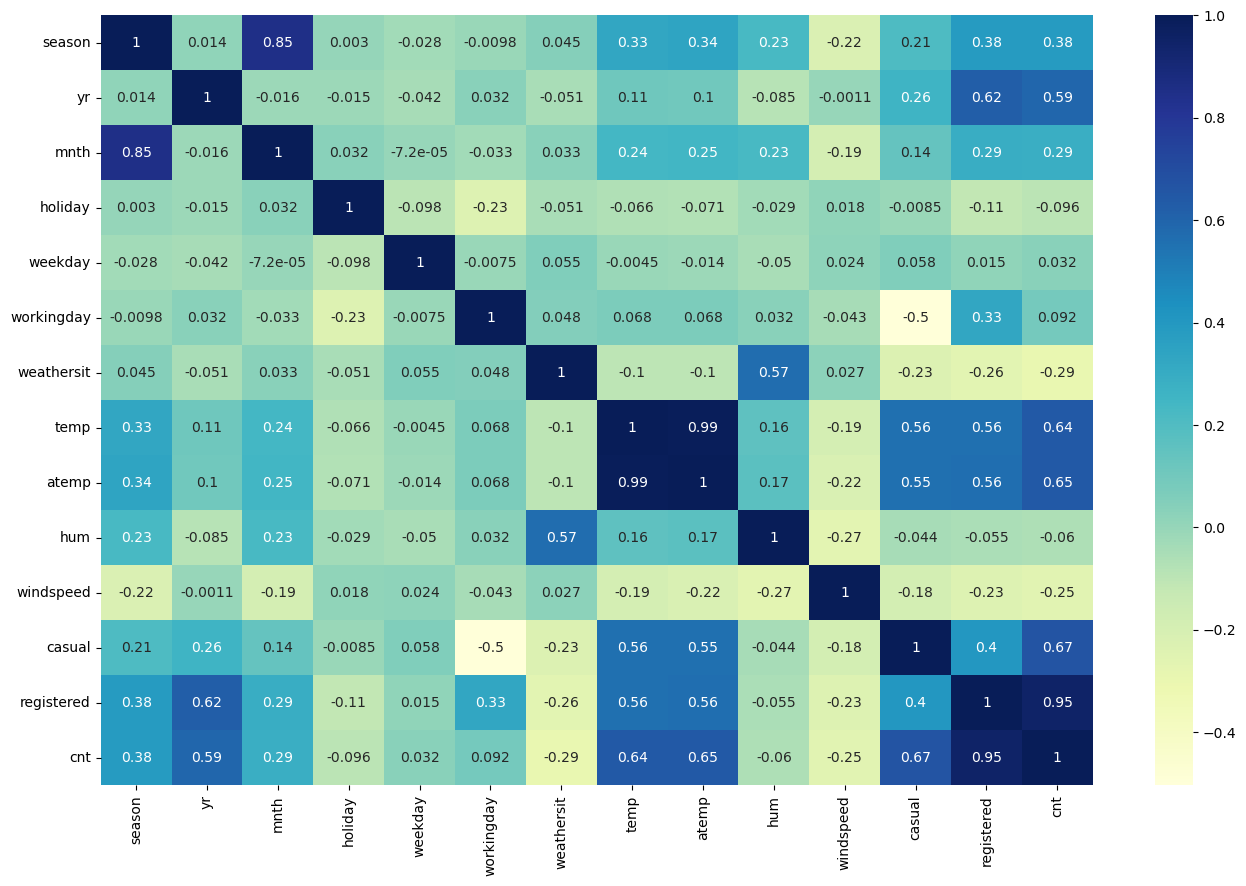

In [389]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [34]:
#As we can see image above that temp, atemp, yr, season, mnth, casual, registered seem to the correlated to cnt. Let's see a pairplot for temp vs cnt, atempvs cnt, .

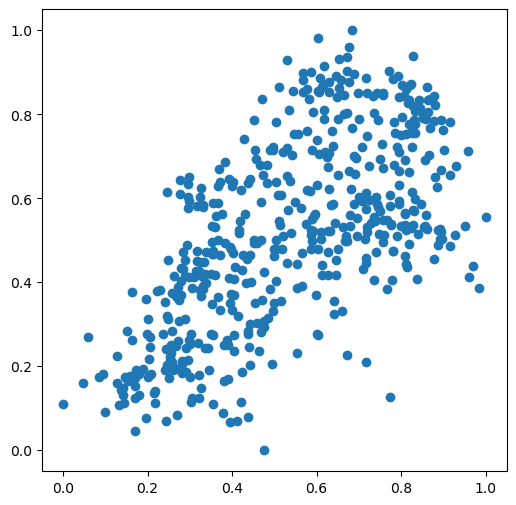

In [267]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

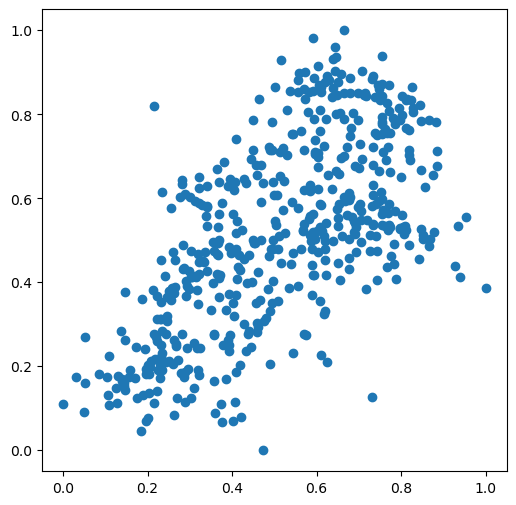

In [138]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.atemp, df_train.cnt)
plt.show()

In [40]:
#So, we pick these variables as the priority variables and we'll try to fit a regression line to that.

In [41]:
#As you might have noticed, registered, causual seems to the correlated to cnt the most however registered, causual have correslation to temp, atemp, year, season, month . Let's check a multicolliation.

In [42]:
#Dividing into X and Y sets for the model building

In [390]:
y_train = df_train.pop('cnt')
X_train = df_train

In [44]:
#Step 5: Building a linear model
#Fit a regression line through the training data using statsmodels. Remember that in statsmodels, we need to explicitly fit a constant using sm.add_constant(X) because if we don't perform this step, statsmodels fits a regression line passing through the origin, by default.

In [391]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['atemp']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [392]:
# Check the parameters obtained

lr.params

const    0.162924
atemp    0.683633
dtype: float64

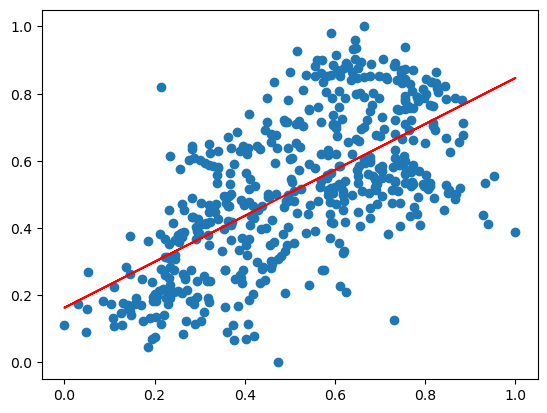

In [393]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.162924 + 0.683633*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [394]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     364.7
Date:                Tue, 14 Mar 2023   Prob (F-statistic):           1.10e-61
Time:                        23:21:16   Log-Likelihood:                 176.51
No. Observations:                 510   AIC:                            -349.0
Df Residuals:                     508   BIC:                            -340.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1629      0.020      8.199      0.0

In [105]:
#Adding another variable
#The R-squared value obtained is 0.418. Since we have so many variables, we can clearly do better than this. So let's go ahead and add the second most highly correlated variable, i.e. windspeed.

In [404]:
# Assign  the feature variables to X
X_train_lm = X_train[['atemp', 'windspeed']]

In [396]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const        0.227954
atemp        0.656271
windspeed   -0.158976
dtype: float64

In [397]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     192.6
Date:                Tue, 14 Mar 2023   Prob (F-statistic):           6.08e-63
Time:                        23:22:11   Log-Likelihood:                 182.61
No. Observations:                 510   AIC:                            -359.2
Df Residuals:                     507   BIC:                            -346.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2280      0.027      8.435      0.0

In [398]:
#We have clearly improved the model as the value of adjusted R-squared as its value has gone up from 0.417 to 0.432. Let's go ahead and add another variable, bedrooms.

In [403]:
# Assign the feature variables to X
X_train_lm = X_train[['atemp', 'windspeed','hum']]

In [401]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const        0.452005
atemp        0.683025
windspeed   -0.227819
hum         -0.331646
dtype: float64

In [402]:
# Print the summary of the model

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     152.1
Date:                Tue, 14 Mar 2023   Prob (F-statistic):           2.90e-70
Time:                        23:24:11   Log-Likelihood:                 202.43
No. Observations:                 510   AIC:                            -396.9
Df Residuals:                     506   BIC:                            -379.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4520      0.044     10.357      0.0

In [113]:
#We have improved the adjusted R-squared again. Now let's go ahead and add all the feature variables.

In [405]:
#Adding all the variables to the model
bikes.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [406]:
#Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const         1.061651e-15
season        6.297046e-16
yr            3.573530e-16
mnth          3.972517e-16
holiday      -1.700029e-16
weekday       4.787837e-16
workingday    4.891920e-16
weathersit    3.261280e-16
temp          1.720846e-15
atemp        -3.330669e-16
hum           2.359224e-16
windspeed    -4.475587e-16
casual        3.774735e-01
registered    7.968247e-01
dtype: float64

In [407]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.889e+29
Date:                Tue, 14 Mar 2023   Prob (F-statistic):               0.00
Time:                        23:26:06   Log-Likelihood:                 16300.
No. Observations:                 510   AIC:                        -3.257e+04
Df Residuals:                     496   BIC:                        -3.251e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.062e-15   1.07e-15      0.989      0.3

In [411]:
#Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).
#Maybe we could drop some?
#We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information.

In [410]:
#Checking VIF
#Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating VIF is:
#𝑉𝐼𝐹𝑖=1/(1−𝑅𝑖2)

In [412]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [413]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,atemp,350.72
7,temp,335.54
12,registered,40.49
9,hum,16.66
2,mnth,13.43
0,season,12.26
5,workingday,10.06
11,casual,9.09
1,yr,5.72
10,windspeed,3.81


In [414]:
#We generally want a VIF that is less than 5. So there are clearly some variables we need to drop as atemp

In [415]:
# Dropping highly correlated variables and insignificant variables
X = X_train.drop('atemp', axis=1)

In [416]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [417]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.851e+31
Date:                Tue, 14 Mar 2023   Prob (F-statistic):               0.00
Time:                        23:29:15   Log-Likelihood:                 17448.
No. Observations:                 510   AIC:                        -3.487e+04
Df Residuals:                     497   BIC:                        -3.481e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.804e-16   1.13e-16     -1.602      0.1

In [418]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,registered,40.18
7,temp,16.37
8,hum,15.96
2,mnth,13.43
0,season,12.26
5,workingday,10.06
10,casual,9.09
1,yr,5.69
9,windspeed,3.74
4,weekday,3.19


In [419]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('registered', 1)

In [420]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [421]:
# Print the summary of the model

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     400.3
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          3.95e-239
Time:                        23:30:14   Log-Likelihood:                 621.61
No. Observations:                 510   AIC:                            -1219.
Df Residuals:                     498   BIC:                            -1168.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0492      0.024      2.061      0.0

In [422]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,hum,15.95
7,temp,14.37
2,mnth,13.39
0,season,11.39
10,casual,7.81
5,workingday,5.86
9,windspeed,3.67
4,weekday,3.14
1,yr,2.36
6,weathersit,2.34


In [423]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('hum', 1)

In [424]:
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [425]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     439.7
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          3.92e-240
Time:                        23:30:50   Log-Likelihood:                 620.84
No. Observations:                 510   AIC:                            -1220.
Df Residuals:                     499   BIC:                            -1173.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0266      0.015      1.739      0.0

In [426]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,temp,13.53
2,mnth,12.51
0,season,11.31
9,casual,7.49
5,workingday,5.24
8,windspeed,3.37
4,weekday,3.07
1,yr,2.36
6,weathersit,1.60
3,holiday,1.09


In [427]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('temp', 1)

In [428]:
# Build a fifth fitted model
X_train_lm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_lm).fit()

In [429]:
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     422.5
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          2.97e-227
Time:                        23:31:17   Log-Likelihood:                 587.34
No. Observations:                 510   AIC:                            -1155.
Df Residuals:                     500   BIC:                            -1112.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0467      0.016      2.891      0.0

In [430]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,mnth,12.47
0,season,11.21
7,windspeed,3.30
8,casual,3.22
5,workingday,3.09
4,weekday,3.07
1,yr,2.30
6,weathersit,1.57
3,holiday,1.07


In [431]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('mnth', 1)

In [432]:
# Build a sixth fitted model
X_train_lm = sm.add_constant(X)

lr_6 = sm.OLS(y_train, X_train_lm).fit()

In [433]:
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     475.2
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          2.14e-228
Time:                        23:31:36   Log-Likelihood:                 586.85
No. Observations:                 510   AIC:                            -1156.
Df Residuals:                     501   BIC:                            -1118.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0507      0.016      3.254      0.0

In [434]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,windspeed,3.23
7,casual,3.22
4,workingday,3.07
3,weekday,3.01
0,season,2.97
1,yr,2.30
5,weathersit,1.57
2,holiday,1.07


In [435]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('holiday', 1)

In [436]:
# Build a seventh fitted model
X_train_lm = sm.add_constant(X)

lr_7 = sm.OLS(y_train, X_train_lm).fit()

In [437]:
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     543.0
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          1.43e-229
Time:                        23:32:06   Log-Likelihood:                 586.36
No. Observations:                 510   AIC:                            -1157.
Df Residuals:                     502   BIC:                            -1123.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0544      0.015      3.598      0.0

In [438]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,casual,3.21
5,windspeed,3.15
2,weekday,3.01
3,workingday,2.97
0,season,2.93
1,yr,2.30
4,weathersit,1.57


In [439]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('weekday', 1)

In [440]:
# Build a eighth fitted model
X_train_lm = sm.add_constant(X)

lr_8 = sm.OLS(y_train, X_train_lm).fit()

In [441]:
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     630.3
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          2.55e-230
Time:                        23:32:42   Log-Likelihood:                 584.79
No. Observations:                 510   AIC:                            -1156.
Df Residuals:                     503   BIC:                            -1126.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0618      0.015      4.244      0.0

In [442]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,season,2.93
4,windspeed,2.91
5,casual,2.87
2,workingday,2.73
1,yr,2.29
3,weathersit,1.53


In [311]:
#Now as we can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

In [443]:
#Step 7: Residual Analysis of the train data
#So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [444]:
y_train_cnt = lr_8.predict(X_train_lm)

In [445]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Text(0.5, 0, 'Errors')

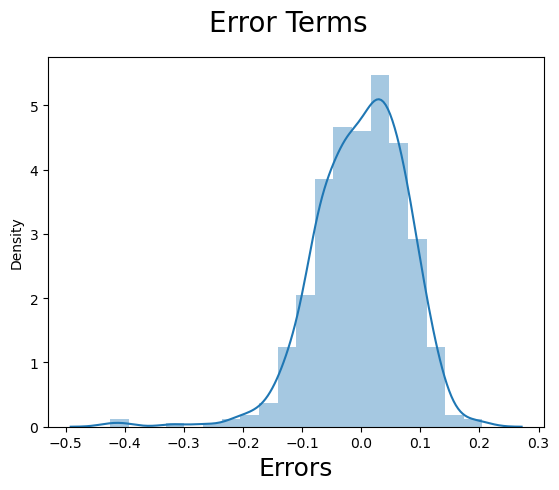

In [446]:
plt.show()

In [317]:
#Step 8: Making Predictions Using the Final Model
#Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. eighth model.

In [318]:
#Applying the scaling on the test sets

In [447]:
num_vars = ['season','mnth','weekday','weathersit','temp','atemp', 'hum', 'windspeed', 'casual','registered','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [448]:
df_test.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.485540,0.479452,0.497717,0.036530,0.503044,0.698630,0.187215,0.558941,0.532991,0.638508,0.313350,0.266372,0.527146,0.520592
std,0.369821,0.500722,0.311080,0.188034,0.331402,0.459904,0.269422,0.233698,0.217888,0.148974,0.159947,0.217246,0.217921,0.218435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.002133,0.059486,0.048205
25%,0.000000,0.000000,0.272727,0.000000,0.166667,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.101951,0.359154,0.377531
50%,0.333333,0.000000,0.454545,0.000000,0.500000,1.000000,0.000000,0.558691,0.549198,0.627737,0.299459,0.223712,0.526567,0.524275
75%,0.666667,1.000000,0.727273,0.000000,0.833333,1.000000,0.500000,0.759096,0.714132,0.743928,0.403048,0.362085,0.664742,0.672745
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,1.038708,0.985273,0.963300


In [449]:
#Dividing into X_test and y_test

In [450]:
y_test = df_test.pop('cnt')
X_test = df_test

In [451]:
# Adding constant variable to test dataframe
X_test_m8 = sm.add_constant(X_test)

In [452]:
# Creating X_test_m8 dataframe by dropping variables from X_test_m8

X_test_m8 = X_test_m8.drop(['atemp', 'registered', 'hum','temp','mnth','holiday','weekday'], axis = 1)

In [453]:
# Making predictions using the eighth model

y_pred_m8 = lr_8.predict(X_test_m8)

In [454]:
#Step 9: Model Evaluation
#Let's now plot the graph for actual versus predicted values.

In [455]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m8)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)     

Text(0, 0.5, 'y_pred')

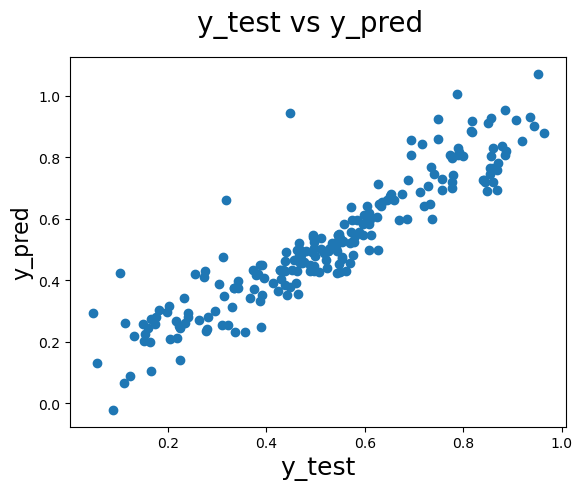

In [456]:
plt.show()

In [ ]:
#From the above plot, it's evident that the model is doing well on the test set as well. Let's also check the R-squared and more importantly, the adjusted R-squared value for the test set.

In [457]:
# r2_score for 6 variables
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_m8)

0.8457675360312557

In [338]:
#Thus, for the model with 6 variables, the r-squared on training and test data is about 88.3% and 84.5% respectively. The adjusted r-squared on the train set is about is about 88.1%.

In [339]:
#We can see that the equation of our best fitted line is:

#cnt=0.1393×season+0.1731×yr+0.2115×workingday-0.1146×weathersit-0.0678×windspeed+0.7663×casual+0.0618